In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [13]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [16]:
accuracy_score(y_pred= knn.predict(X_test), y_true=Y_test)

0.9688

### ***PCA Introduction***

In [17]:
# Standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
# PCA with 100 components
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

X_train = pca.fit_transform(X=X_train_scaled)
X_test = pca.fit_transform(X=X_test_scaled)

X_train.shape, X_test.shape

((60000, 100), (10000, 100))

In [30]:
vars = pca.explained_variance_ 
# eigan values of each components -> describes how much variance is explained by the corresponding eigan vector

vecs = pca.components_
# eigan vectors -> the matrices the transformation of the dataset relies upon

vars_ratio = pca.explained_variance_ratio_ * 100
# describes how much % of variance is explained by the corresponding eigan vector

vars_ratio.sum()

np.float64(76.78356656221465)

In [21]:
# Checking accuracy
knn_ = KNeighborsClassifier()
knn_.fit(X_train, Y_train)
accuracy_score(knn_.predict(X_test), Y_test)

0.5927

- 100 Components are too small to describe the dataset

### ***Optimal n_components***

- **Thumb rule**: best n_components will be that, for which atleast 90 % variance of the dataset can be explained

In [33]:
best_n = 0
explained = 0
for i in range (1, 784):
    temp_pca = PCA(n_components=i)
    temp_pca.fit_transform(X=X_train_scaled)
    temp_pca.fit_transform(X=X_test_scaled)
    explained = (temp_pca.explained_variance_ratio_ * 100).sum()
    best_n += 1
    
    print(f"{best_n} explaining {explained} %.")
    if explained >= 90:
        break
    
best_n

1 explaining 6.196825461356145 %.
2 explaining 10.440571415976752 %.
3 explaining 14.485024194287107 %.
4 explaining 17.71561420496825 %.
5 explaining 20.470686759844995 %.
6 explaining 22.87981160630213 %.
7 explaining 24.925102421559217 %.
8 explaining 26.808257123720498 %.
9 explaining 28.479108072732032 %.
10 explaining 29.996632807493928 %.
11 explaining 31.46871636888998 %.
12 explaining 32.77964844189917 %.
13 explaining 34.034829453793385 %.
14 explaining 35.22899830312241 %.
15 explaining 36.373923674956615 %.
16 explaining 37.468892623993604 %.
17 explaining 38.50072636472876 %.
18 explaining 39.49476254901907 %.
19 explaining 40.4413698738028 %.
20 explaining 41.35291743593066 %.
21 explaining 42.24240086939877 %.
22 explaining 43.1080901021684 %.
23 explaining 43.95520029365431 %.
24 explaining 44.776834786048475 %.
25 explaining 45.56332423564094 %.
26 explaining 46.33372624876332 %.
27 explaining 47.09033094724109 %.
28 explaining 47.82344766948113 %.
29 explaining 48.532

193

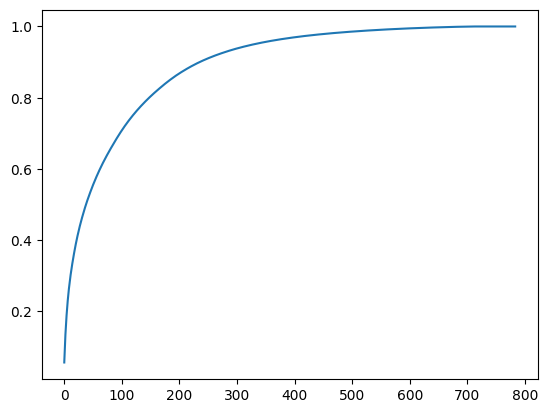

In [47]:
# Another way
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train_scaled)
X_test_trf = pca.transform(X_test_scaled)

pca.explained_variance_ratio_.shape
plt.plot(np.cumsum(pca.explained_variance_ratio_))

- Near 200 we get the optimal n_components

In [40]:
# PCA with optimal n_components
pca__ = PCA(n_components=193)
X_train = pca__.fit_transform(X=X_train_scaled)
X_test = pca__.fit_transform(X=X_test_scaled)

X_train.shape, X_test.shape

((60000, 193), (10000, 193))

In [42]:
knn__=KNeighborsClassifier()
knn__.fit(X_train, Y_train)
accuracy_score(knn.predict(X_test), Y_test)

0.5996